# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objective:

   
  At the end of the experiment, you will be able to :
    
  * Understand various types of gradient descent approaches (Stochastic, Mini-Batch Gradient Descent) and there differences.


In [ ]:
#@title Experiment Walkthrough
#@markdown Gradient descent and learning rate variations
from IPython.display import HTML
HTML("""<video width='520' height='240' controls>
<source src="https://cdn.talentsprint.com/aiml/AIML_BATCH_HYD_7/Week_1/stochastic_minibatch_gradient_descent.mp4" type='video/mp4'>
</video>""")

## Dataset

### Description


The dataset consists of two columns and 90 rows. Each column represents a characteristic of a simple pendulum i.e l (length) and t (time period). The dataset describes the relationship between the l and t which is  $l∝t^2$ .


##AI/ML Technique

#### Gradient Descent

Gradient Descent is used while training a machine learning model. It is an optimization algorithm, based on  first order gradients, that tweaks it’s parameters iteratively to minimize a given function to its local minimum and global minima if the function is convex


## Keywords



* Stochastic Gradient Descent
* Scipy
* Sklearn
* mini batch Gradient Descent
* Plotting Error vs Iteration

#### Expected Time : 90 mins

### Setup Steps

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2100121" #@param {type:"string"}

In [ ]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "5142192291" #@param {type:"string"}

In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "U2W8_08_Stochastic_Minibatch_GD_A" #name of the notebook

def setup(): 
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/week1/Exp1/AIML_DS_REGR01_SIMPLEPENDULUMOSCILLATIONDATA.txt")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Import the required Packages

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stat
from  matplotlib import pyplot as plt
import random
import time

### Load the data

In [ ]:
# Load the data by using pandas read_csv()
data = pd.read_csv("AIML_DS_REGR01_SIMPLEPENDULUMOSCILLATIONDATA.txt", sep=" ", header=None, names=['l', 't'])

# YOUR CODE HERE : Display the first 5 rows of dataframe 'data'
print(data.head())
# YOUR CODE HERE : Display the last 5 rows of dataframe 'data' 
print(data.tail())

      l        t
0  0.10  0.69004
1  0.11  0.69497
2  0.12  0.74252
3  0.13  0.75360
4  0.14  0.83568
       l       t
85  0.95  1.9841
86  0.96  2.0066
87  0.97  2.0493
88  0.98  2.0503
89  0.99  2.0214


In [ ]:
# Get the length and time period values from the dataset
l = data['l'].values
t = data['t'].values
# Get the square of time period
tsq = t * t

**Stochastic gradient descent (Single sample)**

Instead of computing the sum of all gradients, stochastic gradient descent selects an observation uniformly at random.

 $y_i = mx_i + c$

$E$ = $(y - y_i)^2$


$\frac{\partial E_i }{\partial m}$ = $ -2(y_i - (mx_i + c)) * x_i$

$\frac{\partial E_i }{\partial c}$ = $ -2(y_i - (mx_i + c))$

In [ ]:
"""
The function 'next_step' updates the values of m and c and calculates error. 
The loss is minimized due to the changed values of m and c.
The new values m, c and the minimized loss is returned.
"""
def next_step(x, y, m, c, eta):
    
    # YOUR CODE  HERE : Based on description of the function above, code the function below to return the appropriate values
    ycalc = m * x + c
    error = (y - ycalc) **2
    delta_m = -(y - ycalc) * x * 2
    delta_c = -(y - ycalc) * 2
    m = m - delta_m * eta
    c = c - delta_c * eta
    return m, c, error

"""
The function below takes a random index and at that index idx, we calculate the values of m,c and error.
We use one data point at a time x[idx],y[idx]
Here we call the funtion 'next_step' to which we pass a data point x[idx],y[idx]
"""
def one_loop_random(x, y, m, c, eta):
    # Making random idx
    random_idx = np.arange(len(y))
    np.random.shuffle(random_idx)
    # Training with random idx
    for idx in random_idx:
        m, c, e = next_step(x[idx], y[idx], m, c, eta)
        #print(m, c, e)
    return m,c,e
  
"""
The function below trains the data for 1000 iterations. 
In each iteration it calls the 'one_loop_random' function.
"""
def train_stochastic(x, y, m, c, eta, iterations=1000):
    for iteration in range(iterations):
        m, c, err = one_loop_random(x,  y, m, c, eta) # YOUR CODE HERE : Call 'one_loop_random' function defined above by passing 'x', 'y', 'm', 'c', 'eta' as it's arguments.
    return m, c, err

## TRAIN

In [ ]:
# Init m, c
m, c = 0, 0

In [ ]:
# Learning rate
lr = 0.001

m = 4.14138 c = 0.0734568 Error = 0.0051842
m = 4.14132 c = 0.073334 Error = 0.00170094
m = 4.14143 c = 0.0735629 Error = 0.00511778
m = 4.14133 c = 0.0733866 Error = 0.00193037
m = 4.14155 c = 0.0736852 Error = 0.00237569
m = 4.14161 c = 0.073841 Error = 0.0307801
m = 4.14144 c = 0.0735448 Error = 0.0425805
m = 4.14159 c = 0.0737876 Error = 0.00955683
m = 4.1414 c = 0.0735237 Error = 0.00585075
m = 4.14147 c = 0.0736332 Error = 0.000495749


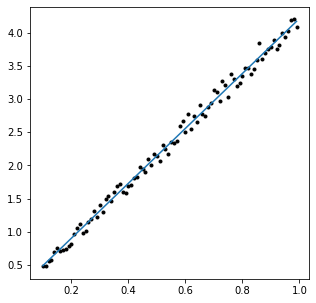

In [ ]:
# Training for 1000 iterations, plotting after every 100 iterations:
%matplotlib inline
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
# plt.ion()
# fig.show()
# fig.canvas.draw()

for num in range(10):
    m, c, error = train_stochastic(l, tsq, m, c, lr, iterations=1000) #YOUR CODE  HERE :  Call the train_stochastic() method to update m and c and get error value with lr = 0.001.
    print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))
    y = m * l + c
    ax.clear()
    ax.plot(l, tsq, '.k')
    ax.plot(l, y)
    # fig.canvas.draw()
    time.sleep(1)

**Ungraded Exercise 1: Experiment with other lr values.**



m = 4.14 c = 0.0736 Error = 3.25e-05
m = 4.14 c = 0.0736 Error = 0.00461
m = 4.14 c = 0.0736 Error = 0.000918
m = 4.14 c = 0.0736 Error = 0.00512
m = 4.14 c = 0.0736 Error = 6.77e-05
m = 4.14 c = 0.0736 Error = 0.0114
m = 4.14 c = 0.0736 Error = 0.00509
m = 4.14 c = 0.0736 Error = 0.00457
m = 4.14 c = 0.0736 Error = 0.00037
m = 4.14 c = 0.0736 Error = 0.00838


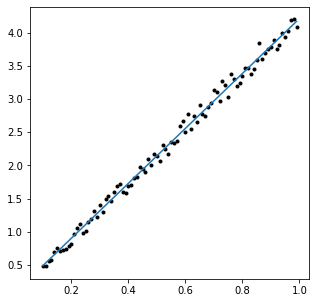

In [ ]:
##Your Code Here
new_lr= 0.0001
# Training for 1000 iterations, plotting after every 100 iterations:
%matplotlib inline
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
# plt.ion()
# fig.show()
# fig.canvas.draw()

# Call the train_stochastic() method to update m and c and get error value with lr = 0.001.
for num in range(10):
    # We will plot the error values for every 100 iterations and error value will decrease for each iteration
    m, c, error = train_stochastic(l, tsq, m, c, new_lr, iterations=100) 
    #print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))
    print("m = {0:.3} c = {1:.3} Error = {2:.3}".format(m, c, error))
    y = m * l + c
    ax.clear()
    ax.plot(l, tsq, '.k')
    ax.plot(l, y)
    fig.canvas.draw()
    time.sleep(1)

**Ungraded Exercise 2: plot Errors vs Iterations**

[INFO] epoch=1, loss=0.0050903
[INFO] epoch=5, loss=0.0092082
[INFO] epoch=10, loss=0.0154789
[INFO] epoch=15, loss=0.0044707
[INFO] epoch=20, loss=0.0045418
[INFO] epoch=25, loss=0.0005054
[INFO] epoch=30, loss=0.0180024
[INFO] epoch=35, loss=0.0290733
[INFO] epoch=40, loss=0.0423993
[INFO] epoch=45, loss=0.0009191
[INFO] epoch=50, loss=0.0018279
[INFO] epoch=55, loss=0.0023505
[INFO] epoch=60, loss=0.0018344
[INFO] epoch=65, loss=0.0003688
[INFO] epoch=70, loss=0.0058300
[INFO] epoch=75, loss=0.0102130
[INFO] epoch=80, loss=0.0127796
[INFO] epoch=85, loss=0.0020392
[INFO] epoch=90, loss=0.0006151
[INFO] epoch=95, loss=0.0050895
[INFO] epoch=100, loss=0.0015794


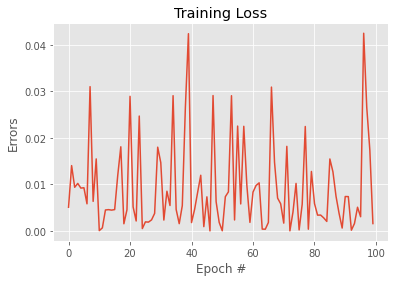

In [ ]:
ms, cs,errs = [], [], []
m, c = 0, 0
lr = 0.001
epochs = 100

# Call the train_stochastic() method to update m and c and get error value with lr = 0.001.
for epoch in range(100):
    # We will plot the error values for every 100 iterations 
    m, c, error = train_stochastic(l, tsq, m, c, lr, epochs) 
    ms.append(m)
    cs.append(c)
    np.array(error)
    errs.append(error)
    ax.clear()
    if epoch == 0 or (epoch + 1) % 5 == 0:
        print("[INFO] epoch={}, loss={:.7f}".format(int(epoch + 1), error))
    # fig.canvas.draw()
plt.style.use("ggplot") # plot loss over time
plt.figure()
plt.plot(np.arange(0, 100), errs)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Errors")
plt.show()


## PROBLEM

Problem with Sequential/Stochastic Gradient Descent is it does not scale well - it makes the same calculation of gradient descent on each sample. So the time taken will increase linearly with the number of samples. Many datasets have samples in the range of millions. Hence, even though it gives good results, it is not ideal.

We need a gradient descent formulation that gives the speed of vanilla gradient descent and the accuracy of sequential/stochastic gradient descent.

Next we will see **Minibatch Gradient Descent!**

### Minibatch Gradient Descent

In Mini-Batch Gradient Descent algorithm, rather than using  the complete data set, in every iteration we use a subset of training examples (called "batch") to compute the gradient of the cost function. 

Common mini-batch sizes range between 50 and 256, but can vary for different applications.

train_one_batch() : we will be calculating the essenial parts of the Gradient Descent method: 

We assume there are $n$ samples in a batch $B$, for all  $i \in B$, 

$y_i = mx_i + c$
        
$E$ =$\frac{1}{n}$   $\sum_{i=1}^n (y - y_i)^2$

$\frac{\partial E }{\partial m}$ = $\frac{2}{n}$   $\sum_{i=1}^n  -x_i(y - (mx_i + c))$
 
$\frac{\partial E}{\partial c}$ = $\frac{2}{n}$   $\sum_{i=1}^n  -(y - (mx_i + c))$

train_batches() : We will be splitting our data into batches.

In [ ]:
"""
The function 'train_one_batch' updates the values of m and c and calculates error. 
The loss is minimized due to the changed values of m and c.
The new values m, c and the minimized loss is returned.
"""
def train_one_batch(x, y, m, c, eta):
   # YOUR CODE HERE : Calculate "delta_m" and "delta_c"
    const = - 2.0/len(y)
    ycalc = m * x + c
    delta_m = const * sum(x * (y - ycalc))
    delta_c = const * sum(y - ycalc)
    m = m - delta_m * eta
    c = c - delta_c * eta
    error = sum((y - ycalc)**2)/len(y)
    return m, c, error

"""
The function below takes a batch_size and loss is calculated w.r.t batches.
The batches are created using random index.
The m, c and error values are calculated for each batch of data.
So, it calls the function 'train_one_batch' by passing batch_x, batch_y for each batch.
"""
def train_batches(x, y, m, c, eta, batch_size):
    # Making the batches
    random_idx = np.arange(len(y))
    np.random.shuffle(random_idx)
    
    # Train each batch
    for batch in range(len(y)//batch_size):
        batch_idx = random_idx[batch*batch_size:(batch+1)*batch_size]
        batch_x = x[batch_idx]
        batch_y = y[batch_idx]
        m, c, err = train_one_batch(batch_x, batch_y, m, c, eta)
    
    return m, c, err

"""
The function below trains the data for 1000 iterations. 
The data is traversed in batches, the batch size here is considered to be 10.
In each iteration it calls the 'train_batches' function. 
The 'batch_size' is passed as a parameter to 'train_batches'.
"""
def train_minibatch(x, y, m, c, eta, batch_size=10, iterations=1000):
    for iteration in range(iterations):
        m, c, err = train_batches(x,y,m,c,eta,batch_size)# YOUR CODE HERE : Call 'train_batches' function defined above by passing 'x', 'y', 'm', 'c', 'eta', 'batch_size' as  it's arguments.
    return m, c, err


#### TRAIN

In [ ]:
# Init m, c
m, c = 0, 0

In [ ]:
# Learning rate
lr = 0.001

In [ ]:
# Batch size
batch_size = 90

m = 0.276529 c = 0.408341 Error = 4.1726
m = 0.49608 c = 0.718257 Error = 2.71618
m = 0.671759 c = 0.952549 Error = 1.8504
m = 0.813639 c = 1.12874 Error = 1.33379
m = 0.929467 c = 1.26031 Error = 1.02365
m = 1.0252 c = 1.35762 Error = 0.835624
m = 1.10541 c = 1.42863 Error = 0.719865
m = 1.17362 c = 1.47945 Error = 0.646911
m = 1.23254 c = 1.51479 Error = 0.599347
m = 1.28426 c = 1.53828 Error = 0.566879


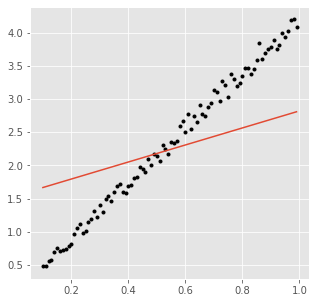

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
# Training for 1000 iterations, plotting after every 100 iterations:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
# plt.ion()
# fig.show()
# fig.canvas.draw()


for num in range(10):
    m, c, er = train_minibatch(l, tsq, m, c, lr,batch_size=90, iterations=100) # YOUR CODE HERE : Call the train_minibatch() method to update m and c and get error value with lr = 0.001 and batch_size=90.
    print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, er))
    y = m * l + c
    ax.clear()
    ax.plot(l, tsq, '.k')
    ax.plot(l, y)
    # fig.canvas.draw()
    time.sleep(1)

**Ungraded Exercise 3: Experiment with other lr values.**

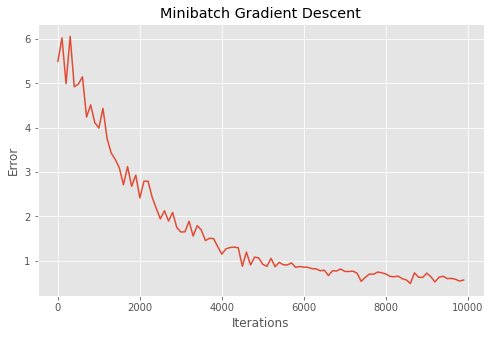

In [ ]:
## Your Code Here
ms, cs,errs = [], [], []
m, c = 0, 0
lr = 0.0001
batch_size = 50

# Call the train_minibatch() method to update m and c and get error value with lr = 0.001 and batch_size = 10.
for times in range(100):
    # We will plot the error values for every 100 iterations
    m, c, error = train_minibatch(l, tsq, m, c, lr, batch_size, iterations=100)
    ms.append(m)
    cs.append(c)
    
    errs.append(error)
    
# plot Errors vs Iterations
epoch = range(0, 10000, 100)
plt.figure(figsize=(8, 5))
plt.plot(epoch, errs)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Minibatch Gradient Descent")
plt.show()

**Ungraded Exercise 4: Experiment with other batch_size values.**

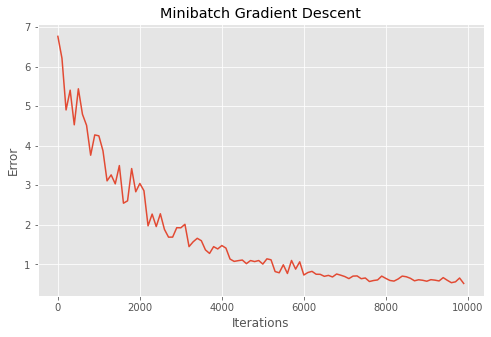

In [ ]:
# YOUR CODE HERE
ms, cs,errs = [], [], []
m, c = 0, 0
lr = 0.0001
batch_size = 50

# Call the train_minibatch() method to update m and c and get error value with lr = 0.001 and batch_size = 10.
for times in range(100):
    # We will plot the error values for every 100 iterations
    m, c, error = train_minibatch(l, tsq, m, c, lr, batch_size, iterations=100)
    ms.append(m)
    cs.append(c)
    
    errs.append(error)
    
# plot Errors vs Iterations
epoch = range(0, 10000, 100)
plt.figure(figsize=(8, 5))
plt.plot(epoch, errs)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Minibatch Gradient Descent")
plt.show()


#### Plotting error vs iterations

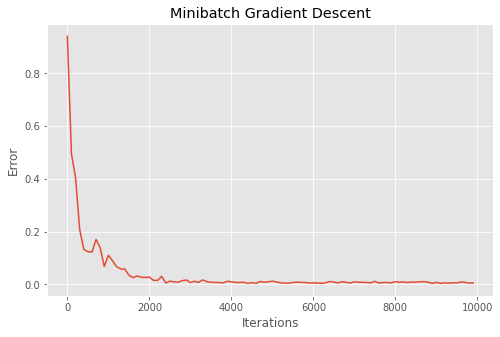

In [ ]:
%matplotlib inline

ms, cs,errs = [], [], []
m, c = 0, 0
lr = 0.001
batch_size = 10

# Call the train_minibatch() method to update m and c and get error value with lr = 0.001 and batch_size = 10.
for times in range(100):
    # We will plot the error values for every 100 iterations
    m, c, error = train_minibatch(l, tsq, m, c, lr, batch_size, iterations=100)
    ms.append(m)
    cs.append(c)
    
    errs.append(error)
    
# plot Errors vs Iterations
epoch = range(0, 10000, 100)
plt.figure(figsize=(8, 5))
plt.plot(epoch, errs)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Minibatch Gradient Descent")
plt.show()

[INFO] training...
[INFO] epoch=1, loss=31.2849773
[INFO] epoch=5, loss=31.2776309
[INFO] epoch=10, loss=31.2673621
[INFO] epoch=15, loss=31.2554549
[INFO] epoch=20, loss=31.2412073
[INFO] epoch=25, loss=31.2234718
[INFO] epoch=30, loss=31.2002334
[INFO] epoch=35, loss=31.1676117
[INFO] epoch=40, loss=31.1171407
[INFO] epoch=45, loss=31.0268070
[INFO] epoch=50, loss=30.8226564
[INFO] epoch=55, loss=30.1360102
[INFO] epoch=60, loss=22.6058400
[INFO] epoch=65, loss=0.9675977
[INFO] epoch=70, loss=0.2561301
[INFO] epoch=75, loss=0.1386837
[INFO] epoch=80, loss=0.0974586
[INFO] epoch=85, loss=0.0775104
[INFO] epoch=90, loss=0.0660606
[INFO] epoch=95, loss=0.0587612
[INFO] epoch=100, loss=0.0537658
[INFO] evaluating...
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       250
           1       1.00      0.99      1.00       250

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weig

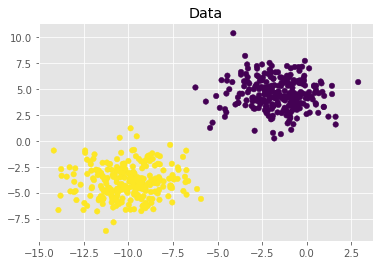

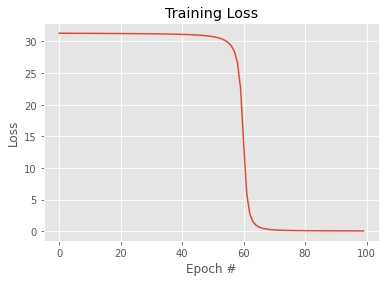

In [67]:
# import the necessary packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import argparse

def sigmoid_activation(x):
	# compute the sigmoid activation value for a given input
	return 1.0 / (1 + np.exp(-x))

def sigmoid_deriv(x):
	# compute the derivative of the sigmoid function ASSUMING
	# that the input `x` has already been passed through the sigmoid
	# activation function
	return x * (1 - x)

def predict(X, W):
	# take the dot product between our features and weight matrix
	preds = sigmoid_activation(X.dot(W))

	# apply a step function to threshold the outputs to binary
	# class labels
	preds[preds <= 0.5] = 0
	preds[preds > 0] = 1

	# return the predictions
	return preds

def next_batch(X, y, batchSize):
	# loop over our dataset `X` in mini-batches, yielding a tuple of
	# the current batched data and labels
	for i in np.arange(0, X.shape[0], batchSize):
		yield (X[i:i + batchSize], y[i:i + batchSize])

# construct the argument parse and parse the arguments
epochs = 100
alpha = 0.001
batch_size = 64

# generate a 2-class classification problem with 1,000 data points,
# where each data point is a 2D feature vector
(X, y) = make_blobs(n_samples=1000, n_features=2, centers=2,
	cluster_std=1.5, random_state=1)
y = y.reshape((y.shape[0], 1))

# insert a column of 1's as the last entry in the feature
# matrix -- this little trick allows us to treat the bias
# as a trainable parameter within the weight matrix
X = np.c_[X, np.ones((X.shape[0]))]

# partition the data into training and testing splits using 50% of
# the data for training and the remaining 50% for testing
(trainX, testX, trainY, testY) = train_test_split(X, y,
	test_size=0.5, random_state=42)

# initialize our weight matrix and list of losses
print("[INFO] training...")
W = np.random.randn(X.shape[1], 1)
losses = []

# loop over the desired number of epochs
for epoch in np.arange(0, epochs):
	# initialize the total loss for the epoch
	epochLoss = []

	# loop over our data in batches
	for (batchX, batchY) in next_batch(trainX, trainY, batch_size):
		# take the dot product between our current batch of features
		# and the weight matrix, then pass this value through our
		# activation function
		preds = sigmoid_activation(batchX.dot(W))

		# now that we have our predictions, we need to determine the
		# `error`, which is the difference between our predictions
		# and the true values
		error = preds - batchY
		epochLoss.append(np.sum(error ** 2))

		# the gradient descent update is the dot product between our
		# (1) current batch and (2) the error of the sigmoid
		# derivative of our predictions
		d = error * sigmoid_deriv(preds)
		gradient = batchX.T.dot(d)

		# in the update stage, all we need to do is "nudge" the
		# weight matrix in the negative direction of the gradient
		# (hence the term "gradient descent" by taking a small step
		# towards a set of "more optimal" parameters
		W += -alpha * gradient

	# update our loss history by taking the average loss across all
	# batches
	loss = np.average(epochLoss)
	losses.append(loss)

	# check to see if an update should be displayed
	if epoch == 0 or (epoch + 1) % 5 == 0:
		print("[INFO] epoch={}, loss={:.7f}".format(int(epoch + 1),
			loss))

# evaluate our model
print("[INFO] evaluating...")
preds = predict(testX, W)
print(classification_report(testY, preds))

# plot the (testing) classification data
plt.style.use("ggplot")
plt.figure()
plt.title("Data")
plt.scatter(testX[:, 0], testX[:, 1], marker="o", c=testY[:, 0], s=30)

# construct a figure that plots the loss over time
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

### Please answer the questions below to complete the experiment:

In [ ]:
#@title For very large datasets, which of the following gradient descent methods is recommended? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "Stochastic" #@param ["","Stochastic","Batch"]


In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "none" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [ ]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")